In [1]:
import ironman
import numpy as np
import pandas as pd
import corner
import matplotlib.pyplot as plt
import rmfit
from astropy import units as u
from astropy import constants as c
import juliet
from astropy.timeseries import LombScargle

In [2]:
#from matplotlib import rc
#rc('font', **{'family':'sans-serif'}) Use only if you have pdflatex (recommended)
#rc('text', usetex=True)

plt.rcParams['xtick.top'] =  True
plt.rcParams['xtick.direction'] =  'in'
plt.rcParams['xtick.major.width'] =  1.0
plt.rcParams['xtick.minor.width'] =  1.0
plt.rcParams['ytick.right'] =  True
plt.rcParams['ytick.direction'] =  'in'
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['ytick.minor.width'] =  1.0
plt.rcParams['lines.markeredgewidth'] =  1.0

In [5]:
dataset1 = juliet.load(input_folder = 'FCO 1/TOI-2431_juliet', out_folder = 'FCO 1/TOI-2431_juliet')
dataset2 = juliet.load(input_folder = 'FCO 2/TOI-2431_juliet', out_folder = 'FCO 2/TOI-2431_juliet')
dataset3 = juliet.load(input_folder = 'FCO 3/TOI-2431_juliet', out_folder = 'FCO 3/TOI-2431_juliet')
dataset4 = juliet.load(input_folder = 'FCO 4/TOI-2431_juliet', out_folder = 'FCO 4/TOI-2431_juliet')

dataset5 = juliet.load(input_folder = 'GP 1/TOI-2431_juliet', out_folder = 'GP 1/TOI-2431_juliet')
dataset6 = juliet.load(input_folder = 'GP 2/TOI-2431_juliet', out_folder = 'GP 2/TOI-2431_juliet')
dataset7 = juliet.load(input_folder = 'GP 3/TOI-2431_juliet', out_folder = 'GP 3/TOI-2431_juliet')
dataset8 = juliet.load(input_folder = 'GP 4/TOI-2431_juliet', out_folder = 'GP 4/TOI-2431_juliet')

In [6]:
results1 = dataset1.fit(sampler = "dynamic_dynesty")
results2 = dataset2.fit(sampler = "dynamic_dynesty")
results3 = dataset3.fit(sampler = "dynamic_dynesty")
results4 = dataset4.fit(sampler = "dynamic_dynesty")

results5 = dataset5.fit(sampler = "dynamic_dynesty")
results6 = dataset6.fit(sampler = "dynamic_dynesty")
results7 = dataset7.fit(sampler = "dynamic_dynesty")
results8 = dataset8.fit(sampler = "dynamic_dynesty")

Detected dynamic_dynesty sampler output files --- extracting from FCO 1/TOI-2431_juliet/_dynesty_DNS_posteriors.pkl
Detected dynamic_dynesty sampler output files --- extracting from FCO 2/TOI-2431_juliet/_dynesty_DNS_posteriors.pkl
Detected dynamic_dynesty sampler output files --- extracting from FCO 3/TOI-2431_juliet/_dynesty_DNS_posteriors.pkl
Detected dynamic_dynesty sampler output files --- extracting from FCO 4/TOI-2431_juliet/_dynesty_DNS_posteriors.pkl
Detected dynamic_dynesty sampler output files --- extracting from GP 1/TOI-2431_juliet/_dynesty_DNS_posteriors.pkl
Detected dynamic_dynesty sampler output files --- extracting from GP 2/TOI-2431_juliet/_dynesty_DNS_posteriors.pkl
Detected dynamic_dynesty sampler output files --- extracting from GP 3/TOI-2431_juliet/_dynesty_DNS_posteriors.pkl
Detected dynamic_dynesty sampler output files --- extracting from GP 4/TOI-2431_juliet/_dynesty_DNS_posteriors.pkl


In [46]:
results_list_fco = [results1,
                    results2,
                    results3,
                    results4]

results_list_gp = [results5,
                   results6,
                   results7,
                   results8]

In [47]:
fco_params = list(results1.posteriors["posterior_samples"].keys())
gp_params = list(results5.posteriors["posterior_samples"].keys())

print(fco_params)
print(gp_params)

['unnamed', 'loglike', 'P_p1', 't0_p1', 'b_p1', 'p_p1', 'rho', 'q1_TESS', 'q2_TESS', 'mflux_TESS', 'sigma_w_TESS', 'GP_sigma_TESS', 'GP_rho_TESS', 'K_p1', 'mu_NEID1', 'mu_NEID2', 'mu_NEID3']
['unnamed', 'loglike', 'P_p1', 't0_p1', 'b_p1', 'p_p1', 'rho', 'q1_TESS', 'q2_TESS', 'mflux_TESS', 'sigma_w_TESS', 'GP_sigma_TESS', 'GP_rho_TESS', 'GP_B_rv', 'GP_C_rv', 'GP_L_rv', 'GP_Prot_rv', 'K_p1', 'mu_NEID', 'sigma_w_NEID', 'mu_HPF', 'sigma_w_HPF']


In [48]:
fco_results = pd.DataFrame(columns = fco_params)
gp_results = pd.DataFrame(columns = gp_params)

fco_results

Empty DataFrame
Columns: [unnamed, loglike, P_p1, t0_p1, b_p1, p_p1, rho, q1_TESS, q2_TESS, mflux_TESS, sigma_w_TESS, GP_sigma_TESS, GP_rho_TESS, K_p1, mu_NEID1, mu_NEID2, mu_NEID3]
Index: []

# FCO: Posterior Comparison DataFrame

In [102]:
fco_rows = []

for result in results_list_fco:
    row = {}
    for parameter in fco_params:
        row[parameter] = juliet.utils.get_quantiles(result.posteriors['posterior_samples'][parameter])[0]
    fco_rows.append(row)

fco_results = pd.DataFrame(fco_rows)

fco_results

unnamed        loglike      P_p1  \
0  [[0.22419575742253026, 2460258.8685262525, 0.2...  417675.095135  0.224196   
1  [[0.22419576181384368, 2460258.868641529, 0.08...  417675.167164  0.224196   
2  [[0.22419583620916148, 2460258.868744668, 0.22...  417675.225851  0.224196   
3  [[0.22419585400549863, 2460258.868662778, 0.43...  417675.196563  0.224196   

          t0_p1      b_p1      p_p1          rho   q1_TESS   q2_TESS  \
0  2.460259e+06  0.410213  0.020811  4151.461670  0.554918  0.255730   
1  2.460259e+06  0.284076  0.020593  4673.410639  0.577603  0.250820   
2  2.460259e+06  0.262802  0.020532  4742.808510  0.609983  0.232775   
3  2.460259e+06  0.398758  0.020772  4206.065386  0.562311  0.249738   

   mflux_TESS  sigma_w_TESS  GP_sigma_TESS  GP_rho_TESS      K_p1   mu_NEID1  \
0   -0.000058    177.017300       0.000272     0.685810  8.255944 -16.963061   
1   -0.000057    177.265659       0.000271     0.685392  8.221223 -16.872985   
2   -0.000058    176.891524       0.000271     0.680959  8.260794 -16.925148   
3   -0.000056    177.548083       0.000272     0.683791  8.273901 -16.811787   

   mu_NEID2  mu_NEID3  
0 -2.348471 -8.986565  
1 -2.239300 -8.910108  
2 -2.204267 -8.954900  
3 -2.204996 -8.976195

# GP: Posterior Comparison DataFrame

In [77]:
gp_rows = []

for result in results_list_gp:
    row = {}
    for parameter in gp_params:
        row[parameter] = juliet.utils.get_quantiles(result.posteriors['posterior_samples'][parameter])[0]
    gp_rows.append(row)

gp_results = pd.DataFrame(gp_rows)

gp_results

unnamed        loglike      P_p1  \
0  [[0.22419579184938018, 2460258.868619247, 0.37...  417640.550613  0.224196   
1  [[0.2241957666731498, 2460258.868544469, 0.452...  417640.350735  0.224196   
2  [[0.22419576091408347, 2460258.86858908, 0.102...  417640.576626  0.224196   
3  [[0.22419572828623002, 2460258.8684071265, 0.3...  417639.219406  0.224196   

          t0_p1      b_p1      p_p1          rho   q1_TESS   q2_TESS  \
0  2.460259e+06  0.243624  0.020493  4798.194610  0.611074  0.246622   
1  2.460259e+06  0.325703  0.020614  4512.594334  0.613320  0.230317   
2  2.460259e+06  0.376383  0.020726  4309.210617  0.585297  0.236201   
3  2.460259e+06  0.308787  0.020580  4588.510945  0.615902  0.238213   

   mflux_TESS  ...  GP_rho_TESS     GP_B_rv   GP_C_rv   GP_L_rv  GP_Prot_rv  \
0   -0.000058  ...     0.684919  137.742043  0.877931  1.706066   43.983775   
1   -0.000055  ...     0.680890  154.705611  0.120835  2.198691   46.910691   
2   -0.000059  ...     0.678037  132.709045  1.240146  1.550952   47.864985   
3   -0.000056  ...     0.685859   57.129708  2.530636  1.483197   50.111898   

       K_p1   mu_NEID  sigma_w_NEID    mu_HPF  sigma_w_HPF  
0  6.953353 -2.978203      0.003136  0.993860     0.007328  
1  6.851632 -2.443734      0.002976  1.233460     0.006209  
2  6.767245 -2.533974      0.002558  1.056165     0.011036  
3  6.384354 -3.539045      5.920460  2.787186     0.107957  

[4 rows x 22 columns]

In [51]:
def get_vals(vec):
    fvec   = np.sort(vec)

    fval  = np.median(fvec)
    nn = int(np.around(len(fvec)*0.15865))

    vali,valf = fval - fvec[nn],fvec[-nn] - fval
    return fval,vali,valf
    
def print_mass_radius_rho_sma_planet(results = results, rstar=1.0, rstar_err=0.1, mstar=1.0, mstar_err=0.1, r_units=u.Rjup, sma_units=u.AU, m_units=u.Mjup):
    """
    Calculate and print the planet's mass, radius, density, and semi-major axis. If r_star and/or m_star are not sampled they must be added as inputs

    Parameters:
    rstar (float) optional: Mean stellar radius in solar radii. Only if r_star not sampled
    rstar_err (float) optional: Error in stellar radius. Only if r_star not sampled
    mstar (float) optional: Mean stellar mass in solar masses. Only if m_star not sampled
    mstar_err (float) optional: Error in stellar mass. Only if m_star not sampled
    r_units (Astropy Unit): Desired output units for the planet's radius.
    sma_units (Astropy Unit): Desired output units for the semi-major axis.
    m_units (Astropy Unit): Desired output units for the planet's mass.
    """
    # chain = self.fit.chain
    Rs = np.random.normal(rstar, rstar_err, len(results.posteriors['posterior_samples']['K_p1'])) * u.Rsun
    Ms = np.random.normal(mstar, mstar_err, len(results.posteriors['posterior_samples']['K_p1'])) * u.Msun

    rp = results.posteriors['posterior_samples']['p_p1'] * Rs
    rp = rp.to(r_units)
    r_planet_val, r_planet_down, r_planet_up = get_vals(rp.value)
    print(f"R_planet: {r_planet_val:.4f} +{r_planet_up:.4f} -{r_planet_down:.4f} {r_units}")

    transit_depth = (rp / Rs.to(r_units))**2
    transit_depth_val, transit_depth_down, transit_depth_up = get_vals(transit_depth.value)
    print(f"Transit depth: {transit_depth_val:.6f} +{transit_depth_up:.6f} -{transit_depth_down:.6f}")
    
    P_sec = results.posteriors['posterior_samples']['P_p1'] * u.day
    P_sec = P_sec.to(u.s)
    aRs = (((P_sec**2 * c.G * Ms) / (4 * np.pi**2))**(1/3))
    sma = aRs.to(sma_units)
    sma_val, sma_down, sma_up = get_vals(sma.value)
    print(f"Sma_planet: {sma_val:.4f} +{sma_up:.4f} -{sma_down:.4f} {sma_units}")

    K = results.posteriors['posterior_samples']['K_p1'] * u.m / u.s
    e = 0
    cos_inc = (results.posteriors['posterior_samples']['b_p1'] * Rs) / sma
    cos_inc = np.clip(cos_inc, -1, 1)
    inc = np.arccos(cos_inc)
    inc_val, inc_down, inc_up = get_vals(inc.value)
    print(f"Inclination: {np.degrees(inc_val):.4f} +{np.degrees(inc_up):.4f} -{np.degrees(inc_down):.4f} deg")
    #inc = 73.83677068878853 * np.pi / 180.0  # Convert to radians
    mp = K * np.sqrt(Ms * sma * (1 - e**2) / c.G) / np.sin(inc)
    mp = mp.to(m_units)
    m_planet_val, m_planet_down, m_planet_up = get_vals(mp.value)
    print(f"M_planet: {m_planet_val:.4f} +{m_planet_up:.4f} -{m_planet_down:.4f} {m_units}")

    dens = (3 * mp / (4 * np.pi * rp**3)).to(u.g / u.cm**3)
    dens_val, dens_down, dens_up = get_vals(dens.value)
    print(f"Rho_planet: {dens_val:.4f} +{dens_up:.4f} -{dens_down:.4f} g/cm^3")

# FCO: Derived Parameters Comparison

In [53]:
print(50*"-")
print("FCO 1")
print(50*"-")
print_mass_radius_rho_sma_planet(results = results1, rstar=0.66,rstar_err=0.01,mstar=0.66,mstar_err=0.02,r_units=u.Rearth,m_units=u.Mearth)
print(50*"-")
print(50*"-")
print("FCO 2")
print(50*"-")
print_mass_radius_rho_sma_planet(results = results2, rstar=0.66,rstar_err=0.01,mstar=0.66,mstar_err=0.02,r_units=u.Rearth,m_units=u.Mearth)
print(50*"-")
print(50*"-")
print("FCO 3")
print(50*"-")
print_mass_radius_rho_sma_planet(results = results3, rstar=0.66,rstar_err=0.01,mstar=0.66,mstar_err=0.02,r_units=u.Rearth,m_units=u.Mearth)
print(50*"-")
print(50*"-")
print("FCO 4")
print(50*"-")
print_mass_radius_rho_sma_planet(results = results4, rstar=0.66,rstar_err=0.01,mstar=0.66,mstar_err=0.02,r_units=u.Rearth,m_units=u.Mearth)
print(50*"-")
print(50*"-")

--------------------------------------------------
FCO 1
--------------------------------------------------
R_planet: 1.5020 +0.0709 -0.0432 earthRad
Transit depth: 0.000433 +0.000042 -0.000019
Sma_planet: 0.0063 +0.0001 -0.0001 AU
Inclination: 78.4541 +6.3451 -6.9376 deg
M_planet: 6.0992 +1.1800 -1.1707 earthMass
Rho_planet: 9.6792 +2.1375 -2.0392 g/cm^3
--------------------------------------------------
--------------------------------------------------
FCO 2
--------------------------------------------------
R_planet: 1.4842 +0.0467 -0.0369 earthRad
Transit depth: 0.000424 +0.000025 -0.000016
Sma_planet: 0.0063 +0.0001 -0.0001 AU
Inclination: 82.0457 +5.4827 -6.9532 deg
M_planet: 6.0127 +1.1566 -1.1574 earthMass
Rho_planet: 9.9792 +2.1113 -1.9934 g/cm^3
--------------------------------------------------
--------------------------------------------------
FCO 3
--------------------------------------------------
R_planet: 1.4789 +0.0389 -0.0339 earthRad
Transit depth: 0.000422 +0.00001

# GP: Derived Parameters Comparison

In [54]:
print(50*"-")
print("GP 1")
print(50*"-")
print_mass_radius_rho_sma_planet(results = results5, rstar=0.66,rstar_err=0.01,mstar=0.66,mstar_err=0.02,r_units=u.Rearth,m_units=u.Mearth)
print(50*"-")
print(50*"-")
print("GP 2")
print(50*"-")
print_mass_radius_rho_sma_planet(results = results6, rstar=0.66,rstar_err=0.01,mstar=0.66,mstar_err=0.02,r_units=u.Rearth,m_units=u.Mearth)
print(50*"-")
print(50*"-")
print("GP 3")
print(50*"-")
print_mass_radius_rho_sma_planet(results = results7, rstar=0.66,rstar_err=0.01,mstar=0.66,mstar_err=0.02,r_units=u.Rearth,m_units=u.Mearth)
print(50*"-")
print(50*"-")
print("GP 4")
print(50*"-")
print_mass_radius_rho_sma_planet(results = results8, rstar=0.66,rstar_err=0.01,mstar=0.66,mstar_err=0.02,r_units=u.Rearth,m_units=u.Mearth)
print(50*"-")
print(50*"-")

--------------------------------------------------
GP 1
--------------------------------------------------
R_planet: 1.4764 +0.0377 -0.0338 earthRad
Transit depth: 0.000420 +0.000017 -0.000014
Sma_planet: 0.0063 +0.0001 -0.0001 AU
Inclination: 83.1609 +4.6052 -5.4205 deg
M_planet: 5.0624 +1.5465 -1.4607 earthMass
Rho_planet: 8.5829 +2.7654 -2.4945 g/cm^3
--------------------------------------------------
--------------------------------------------------
GP 2
--------------------------------------------------
R_planet: 1.4856 +0.0458 -0.0367 earthRad
Transit depth: 0.000425 +0.000023 -0.000016
Sma_planet: 0.0063 +0.0001 -0.0001 AU
Inclination: 80.8364 +5.4728 -5.6569 deg
M_planet: 5.0156 +1.5089 -1.4136 earthMass
Rho_planet: 8.3262 +2.6462 -2.3944 g/cm^3
--------------------------------------------------
--------------------------------------------------
GP 3
--------------------------------------------------
R_planet: 1.4944 +0.0519 -0.0388 earthRad
Transit depth: 0.000430 +0.000028 -

# FCO Corner Plots: P_p1, t0_p1, K_p1, mu_NEID1, mu_NEID2, mu_NEID3, rho

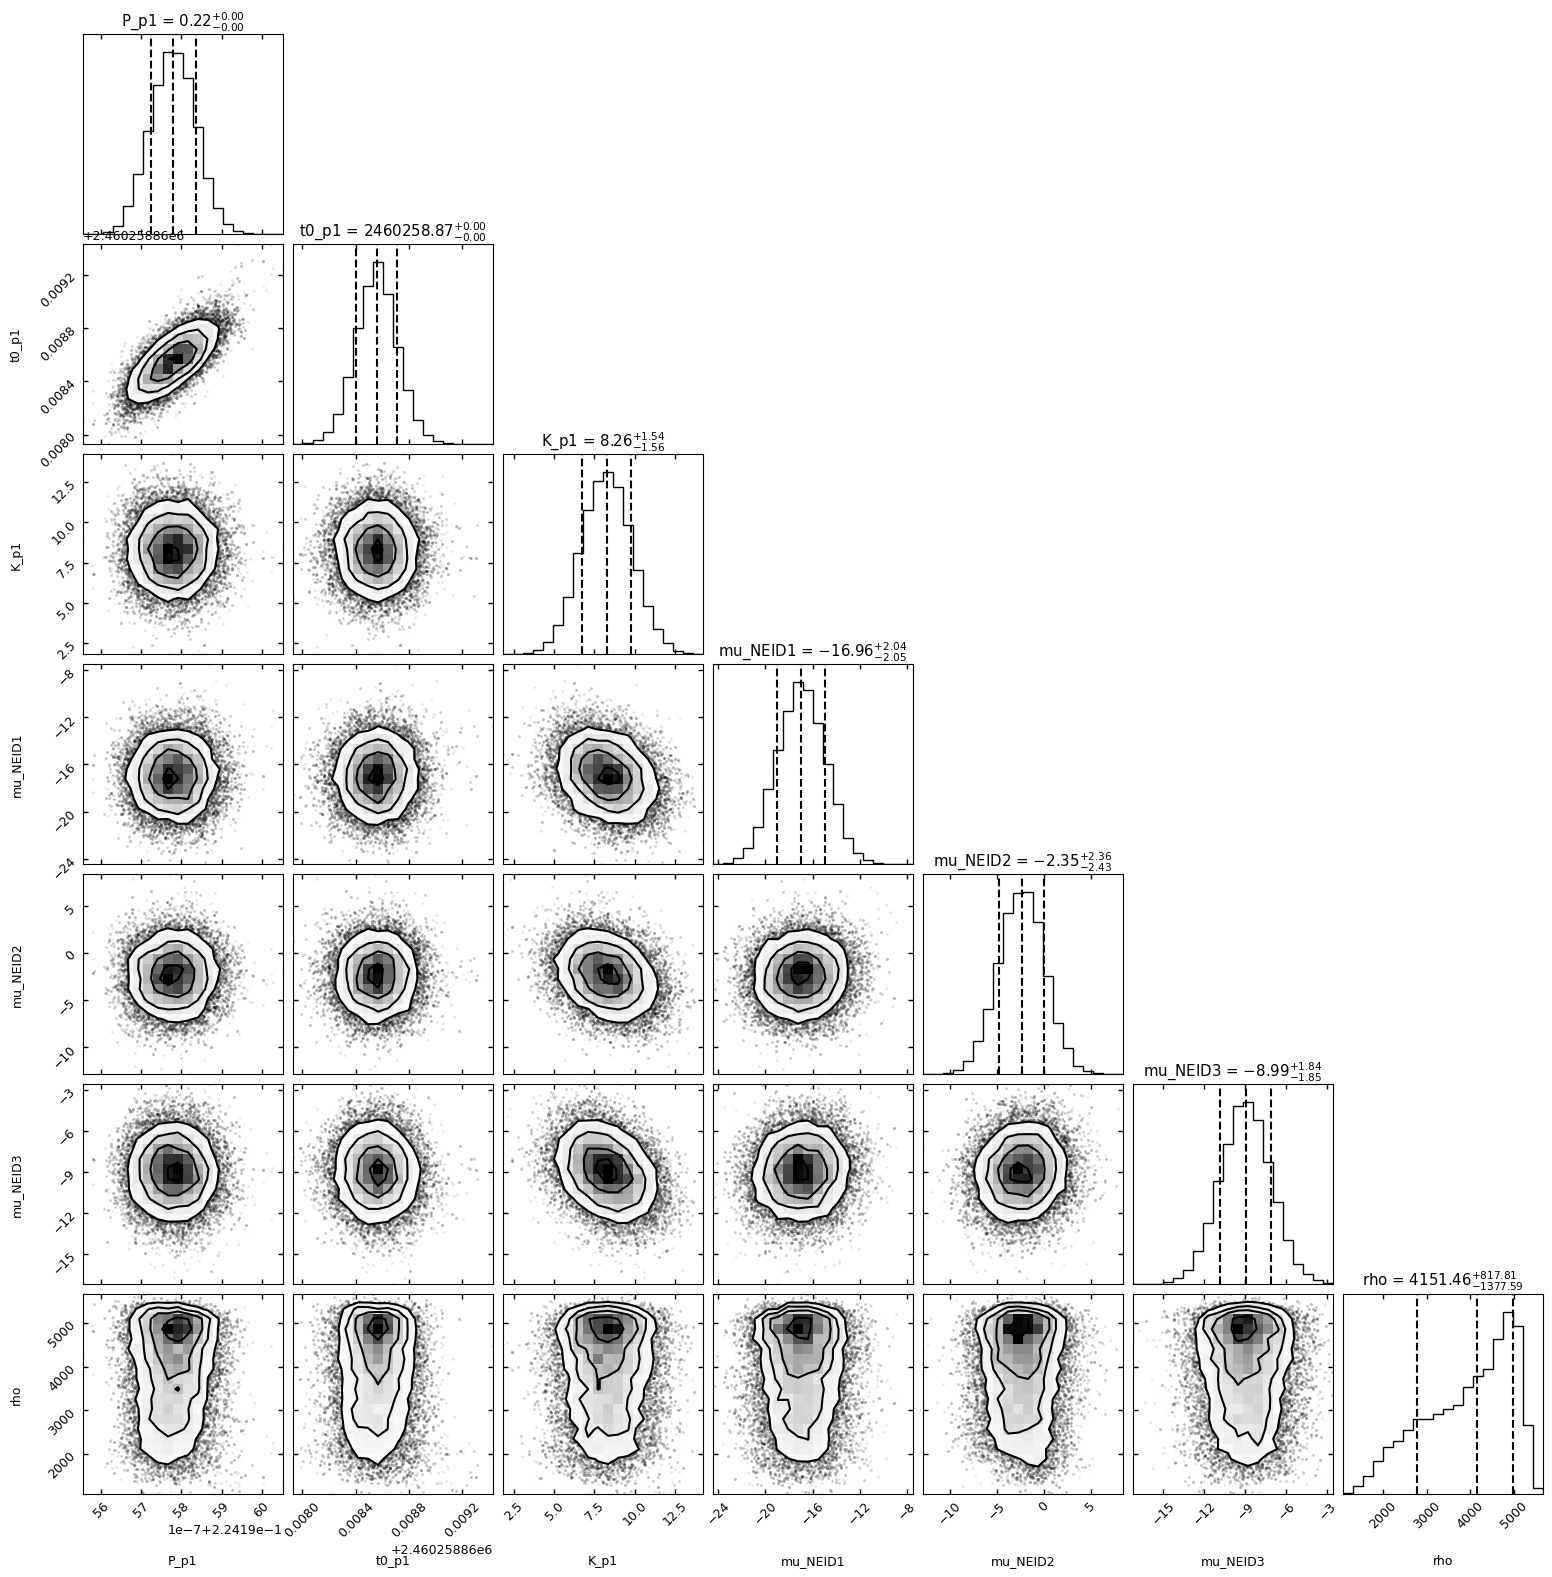

In [87]:
#We call in the samples from the posterior.
samples = results1.posteriors["posterior_samples"]

#We define an array to store the parameters we want to plot on the Corner plot.
corner_plot_params = np.vstack([samples["P_p1"],
                                samples["t0_p1"],
                                samples["K_p1"],
                                samples["mu_NEID1"],
                                samples["mu_NEID2"],
                                samples["mu_NEID3"],
                                samples["rho"]]).T

#We then define the labels of the parameters.
labels = ["P_p1", "t0_p1", "K_p1", "mu_NEID1", "mu_NEID2", "mu_NEID3", "rho"]

#We plot the corner plot.
corner_plot = corner.corner(corner_plot_params, labels = labels, quantiles = [0.16, 0.5, 0.84], show_titles = True)

#plt.savefig("cornerplot_fco.png", dpi = 500)
plt.show()

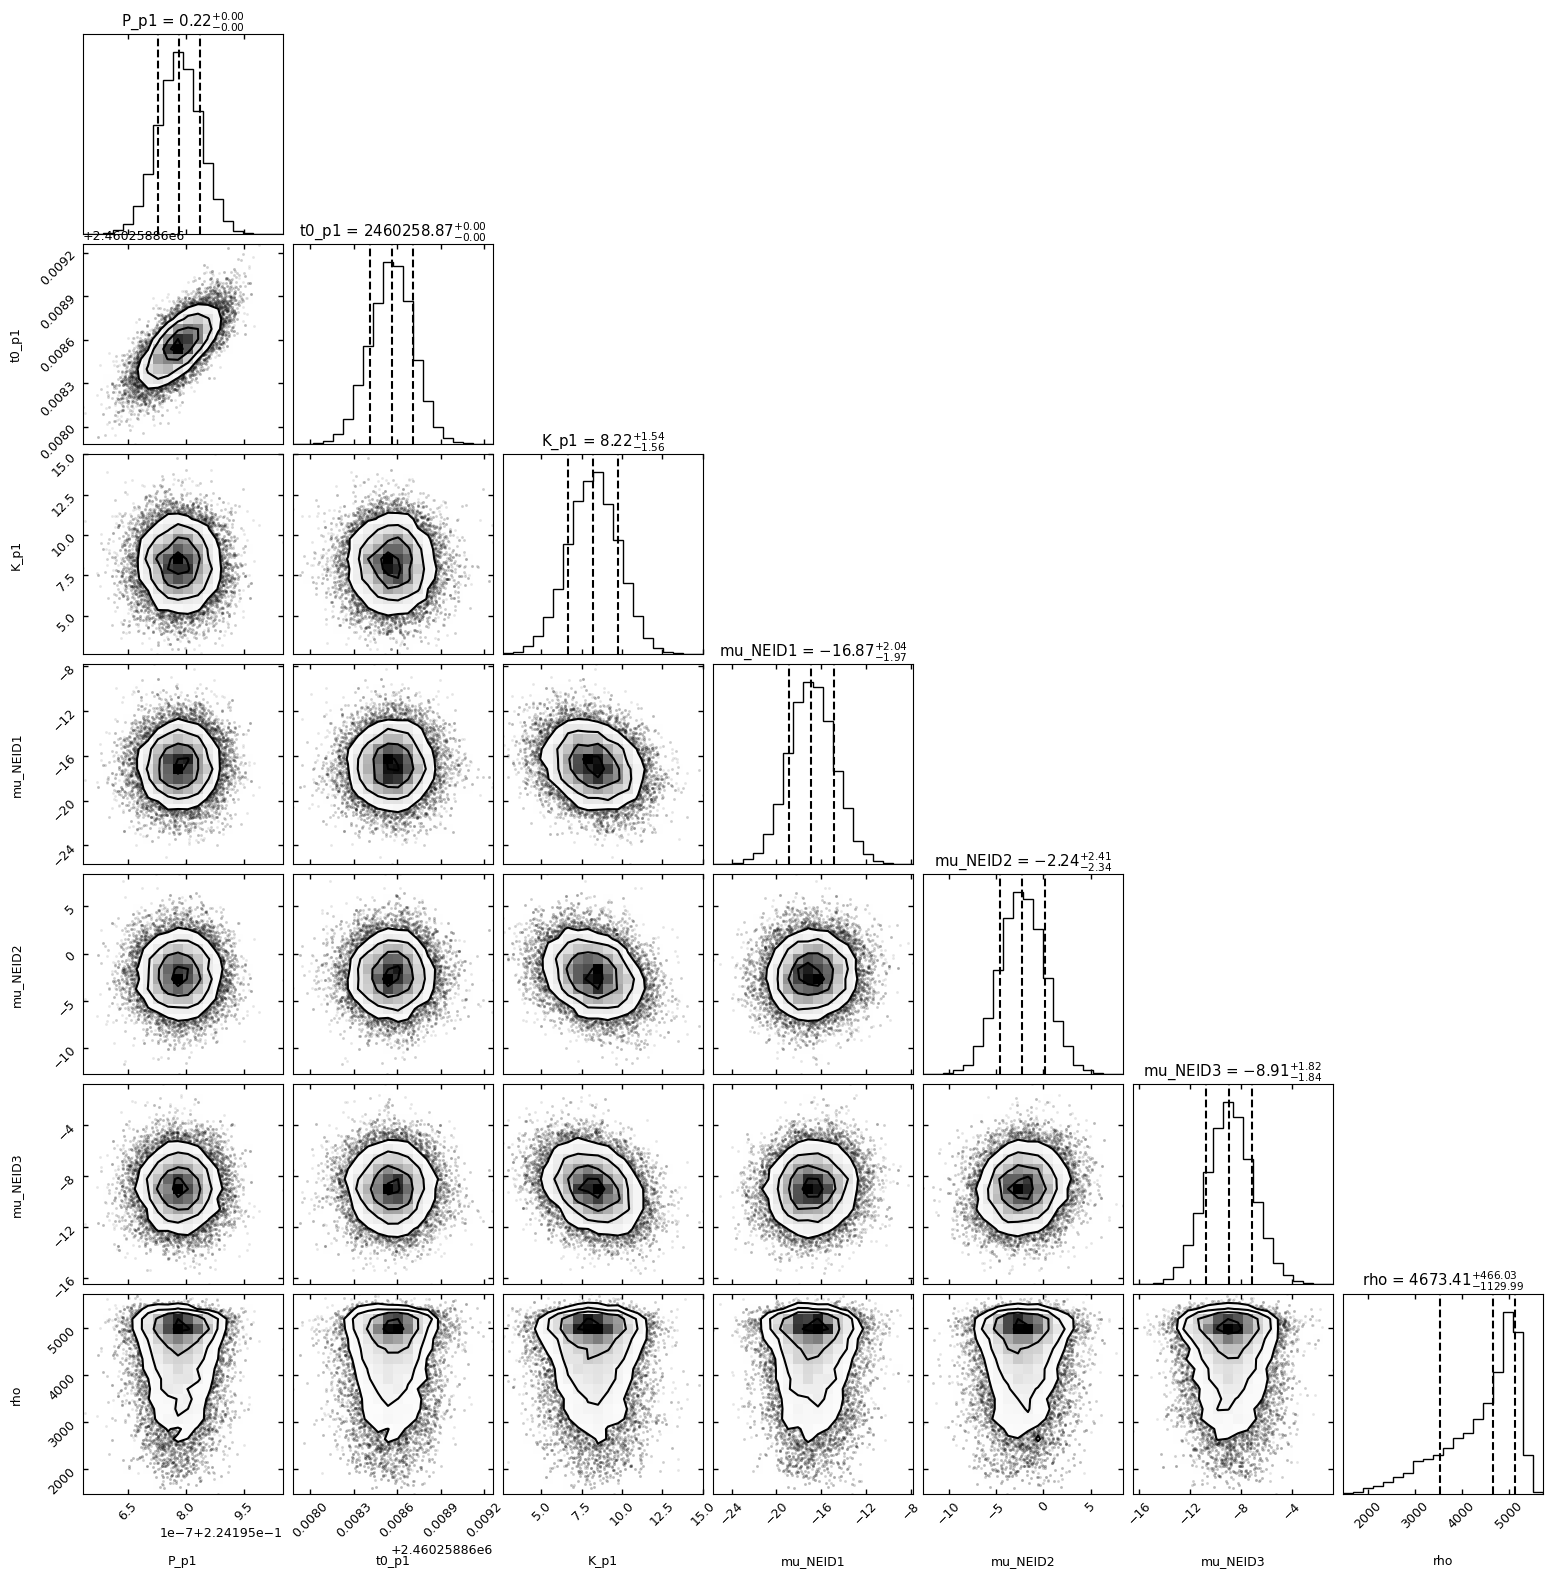

In [88]:
#We call in the samples from the posterior.
samples = results2.posteriors["posterior_samples"]

#We define an array to store the parameters we want to plot on the Corner plot.
corner_plot_params = np.vstack([samples["P_p1"],
                                samples["t0_p1"],
                                samples["K_p1"],
                                samples["mu_NEID1"],
                                samples["mu_NEID2"],
                                samples["mu_NEID3"],
                                samples["rho"]]).T

#We then define the labels of the parameters.
labels = ["P_p1", "t0_p1", "K_p1", "mu_NEID1", "mu_NEID2", "mu_NEID3", "rho"]

#We plot the corner plot.
corner_plot = corner.corner(corner_plot_params, labels = labels, quantiles = [0.16, 0.5, 0.84], show_titles = True)

#plt.savefig("cornerplot_fco.png", dpi = 500)
plt.show()

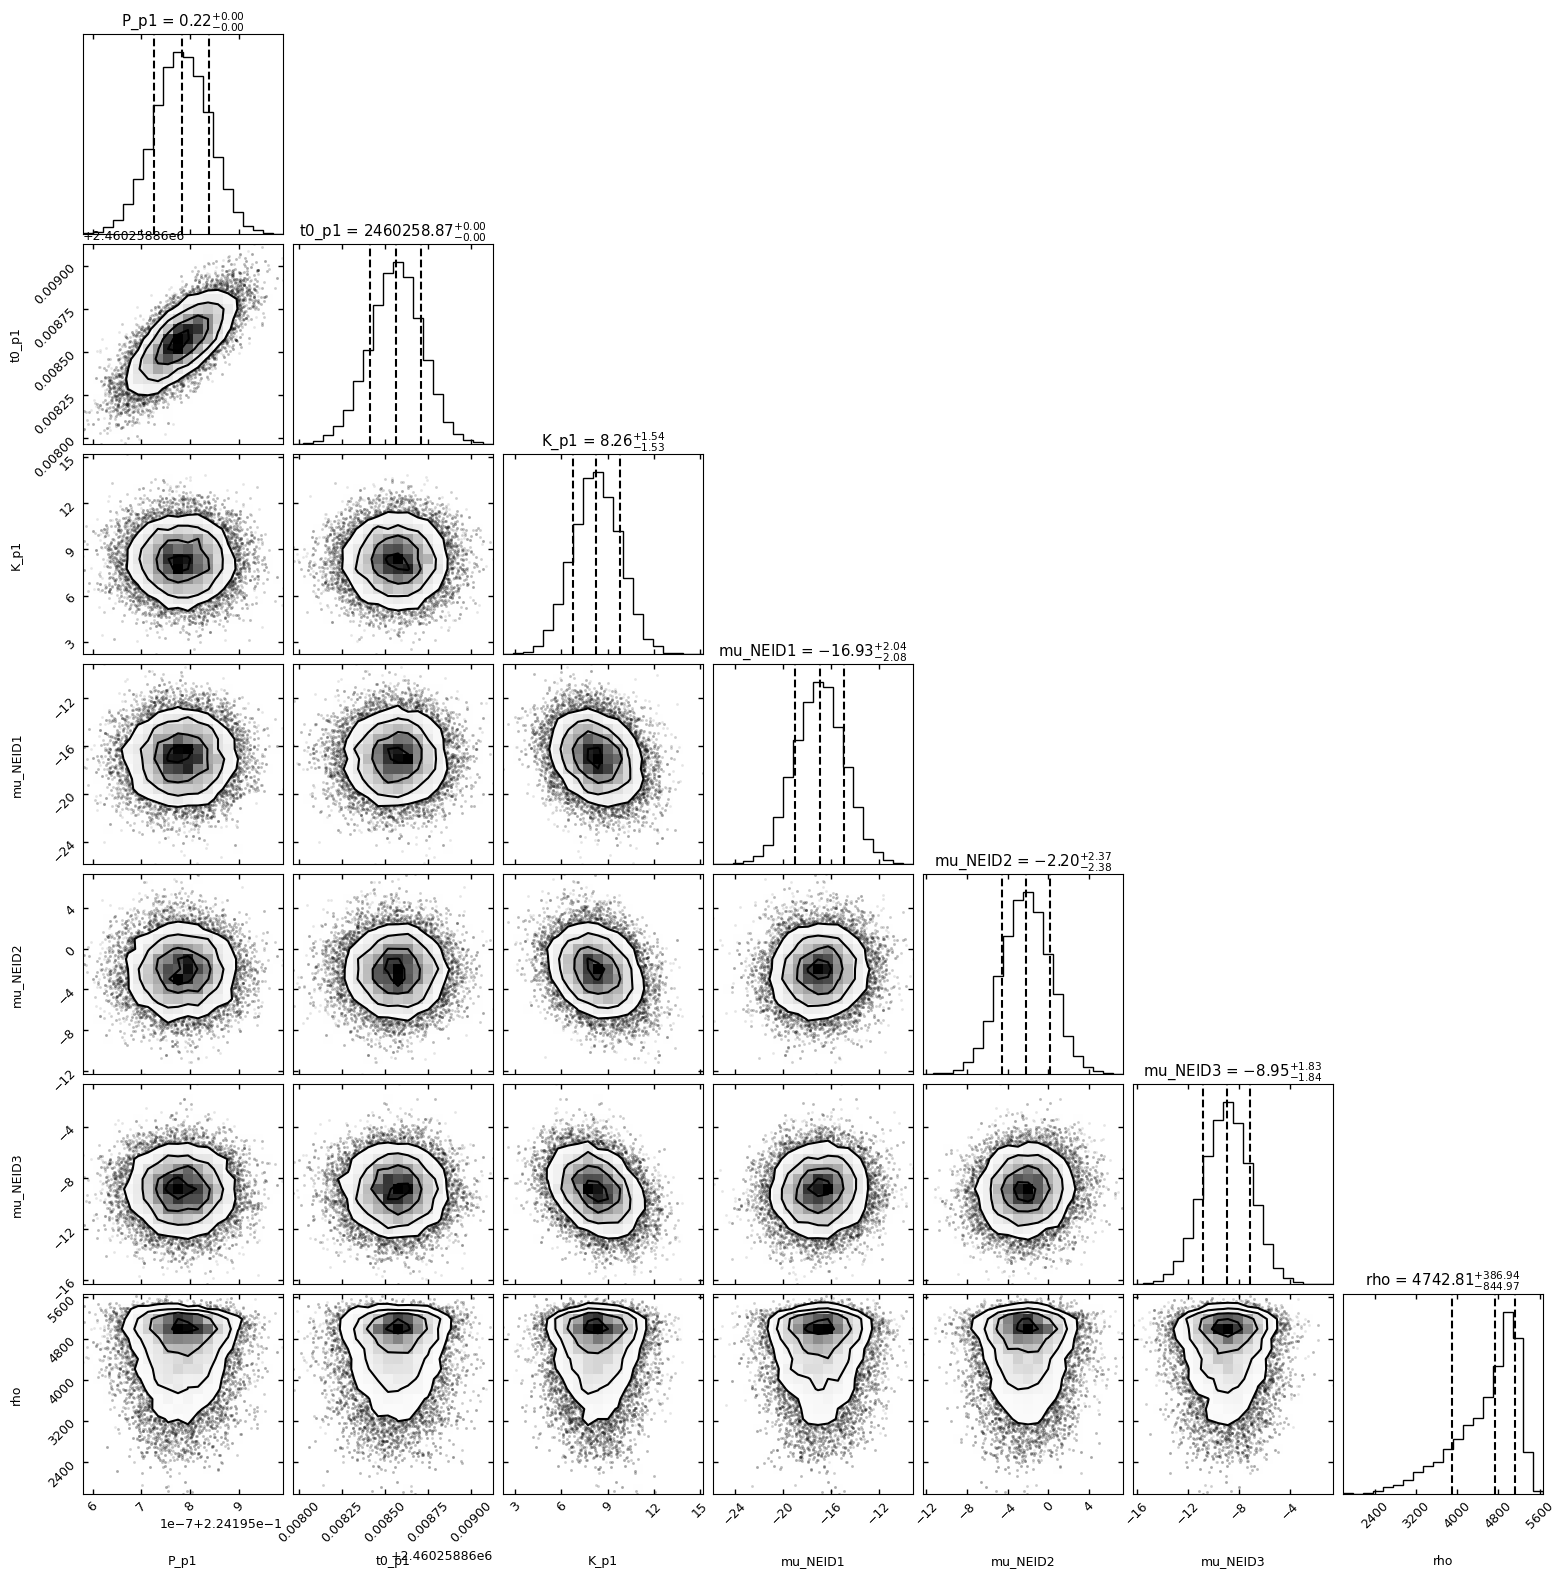

In [89]:
#We call in the samples from the posterior.
samples = results3.posteriors["posterior_samples"]

#We define an array to store the parameters we want to plot on the Corner plot.
corner_plot_params = np.vstack([samples["P_p1"],
                                samples["t0_p1"],
                                samples["K_p1"],
                                samples["mu_NEID1"],
                                samples["mu_NEID2"],
                                samples["mu_NEID3"],
                                samples["rho"]]).T

#We then define the labels of the parameters.
labels = ["P_p1", "t0_p1", "K_p1", "mu_NEID1", "mu_NEID2", "mu_NEID3", "rho"]

#We plot the corner plot.
corner_plot = corner.corner(corner_plot_params, labels = labels, quantiles = [0.16, 0.5, 0.84], show_titles = True)

#plt.savefig("cornerplot_fco.png", dpi = 500)
plt.show()

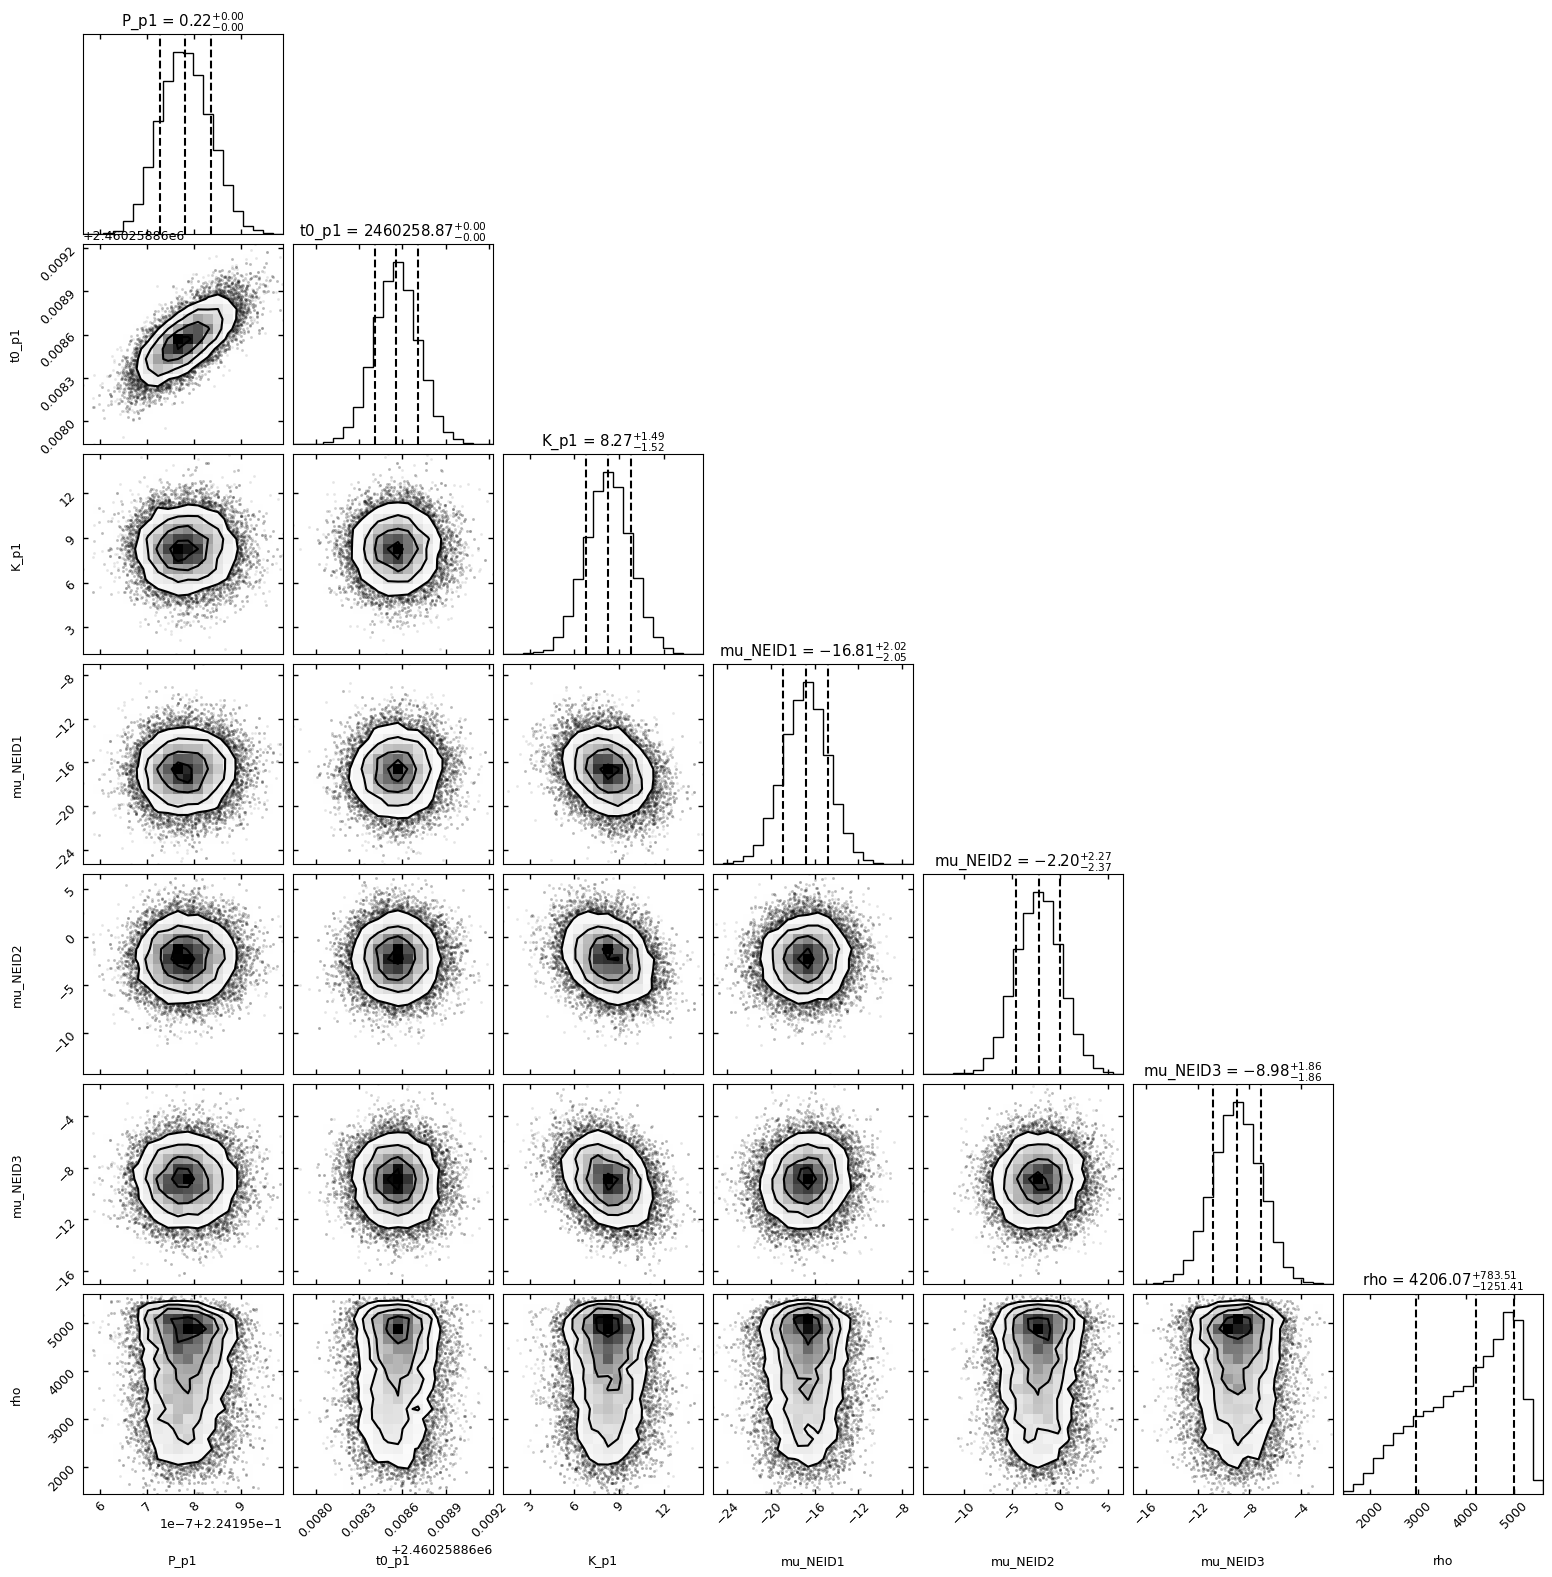

In [90]:
#We call in the samples from the posterior.
samples = results4.posteriors["posterior_samples"]

#We define an array to store the parameters we want to plot on the Corner plot.
corner_plot_params = np.vstack([samples["P_p1"],
                                samples["t0_p1"],
                                samples["K_p1"],
                                samples["mu_NEID1"],
                                samples["mu_NEID2"],
                                samples["mu_NEID3"],
                                samples["rho"]]).T

#We then define the labels of the parameters.
labels = ["P_p1", "t0_p1", "K_p1", "mu_NEID1", "mu_NEID2", "mu_NEID3", "rho"]

#We plot the corner plot.
corner_plot = corner.corner(corner_plot_params, labels = labels, quantiles = [0.16, 0.5, 0.84], show_titles = True)

#plt.savefig("cornerplot_fco.png", dpi = 500)
plt.show()

# FCO Corner Plots: P_p1, t0_p1, K_p1, b_p1, rho

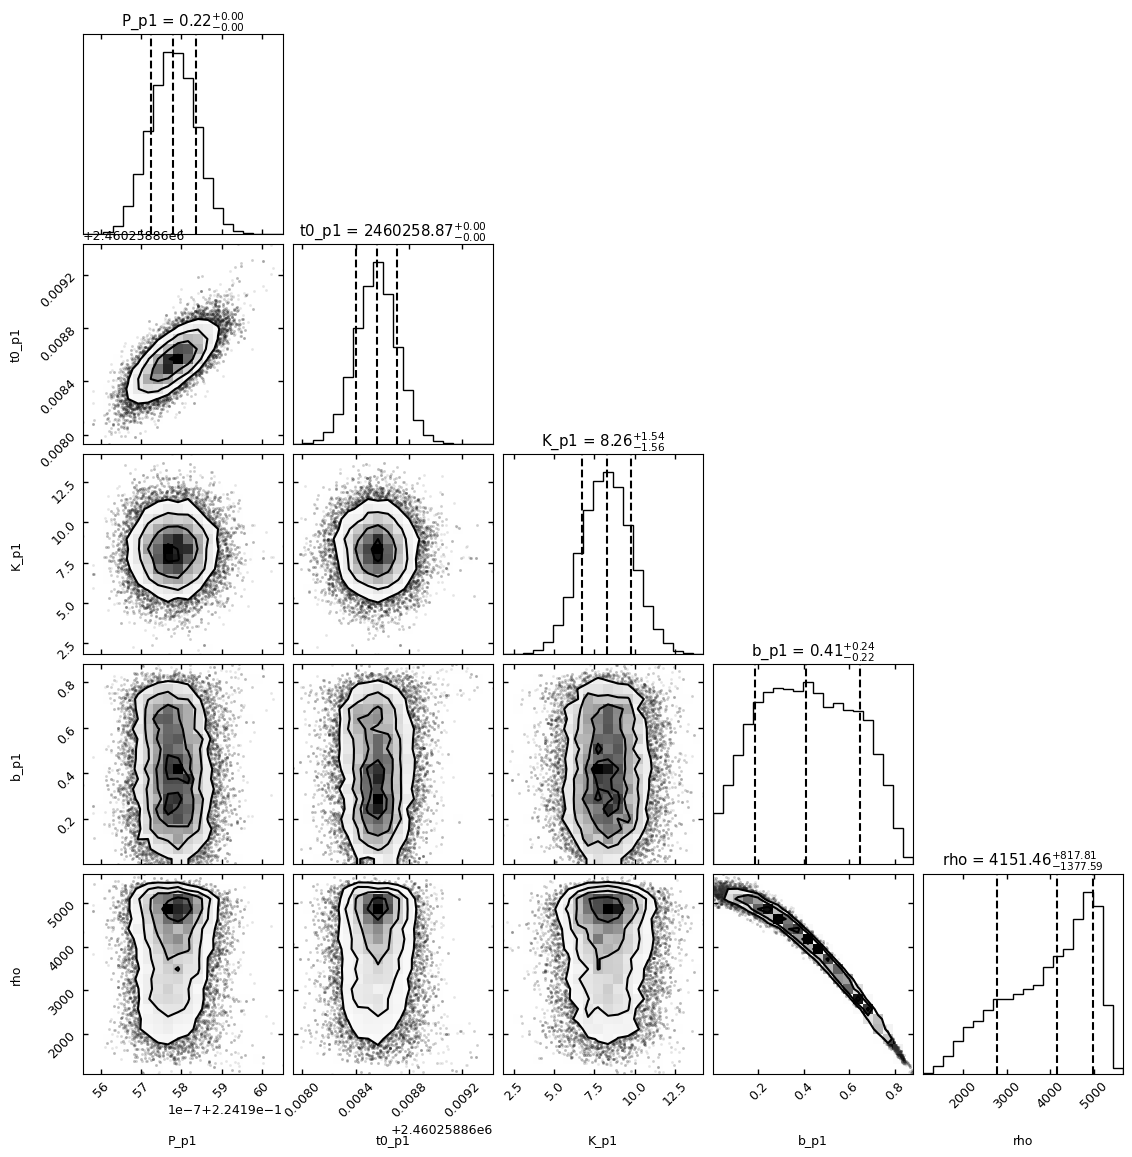

In [91]:
#We call in the samples from the posterior.
samples = results1.posteriors["posterior_samples"]

#We define an array to store the parameters we want to plot on the Corner plot.
corner_plot_params = np.vstack([samples["P_p1"],
                                samples["t0_p1"],
                                samples["K_p1"],
                                samples["b_p1"],
                                samples["rho"]]).T

#We then define the labels of the parameters.
labels = ["P_p1", "t0_p1", "K_p1", "b_p1", "rho"]

#We plot the corner plot.
corner_plot = corner.corner(corner_plot_params, labels = labels, quantiles = [0.16, 0.5, 0.84], show_titles = True)

#plt.savefig("cornerplot_fco.png", dpi = 500)
plt.show()

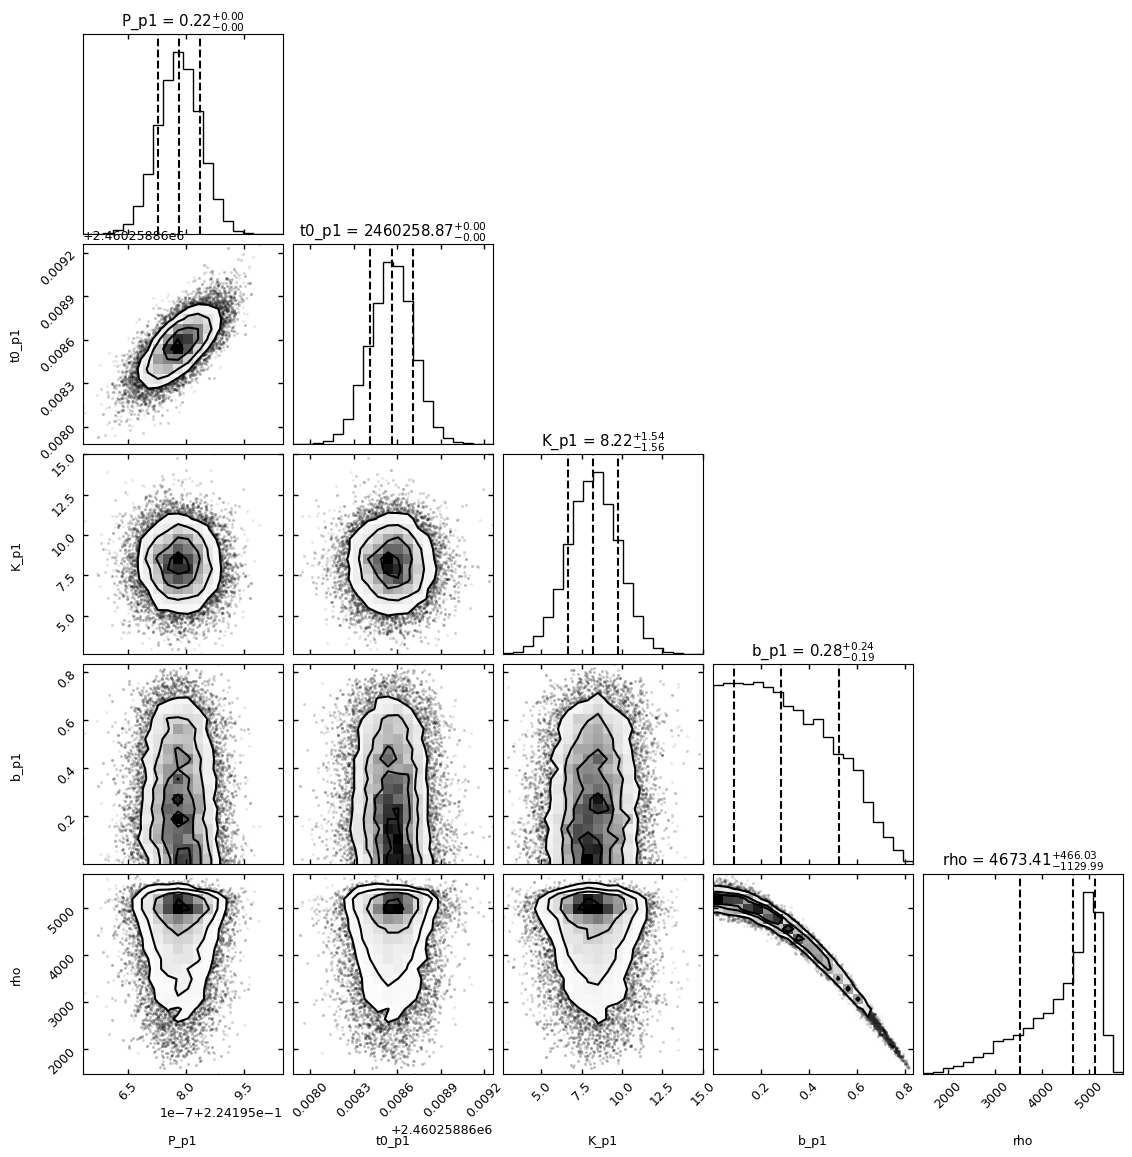

In [92]:
#We call in the samples from the posterior.
samples = results2.posteriors["posterior_samples"]

#We define an array to store the parameters we want to plot on the Corner plot.
corner_plot_params = np.vstack([samples["P_p1"],
                                samples["t0_p1"],
                                samples["K_p1"],
                                samples["b_p1"],
                                samples["rho"]]).T

#We then define the labels of the parameters.
labels = ["P_p1", "t0_p1", "K_p1", "b_p1", "rho"]

#We plot the corner plot.
corner_plot = corner.corner(corner_plot_params, labels = labels, quantiles = [0.16, 0.5, 0.84], show_titles = True)

#plt.savefig("cornerplot_fco.png", dpi = 500)
plt.show()

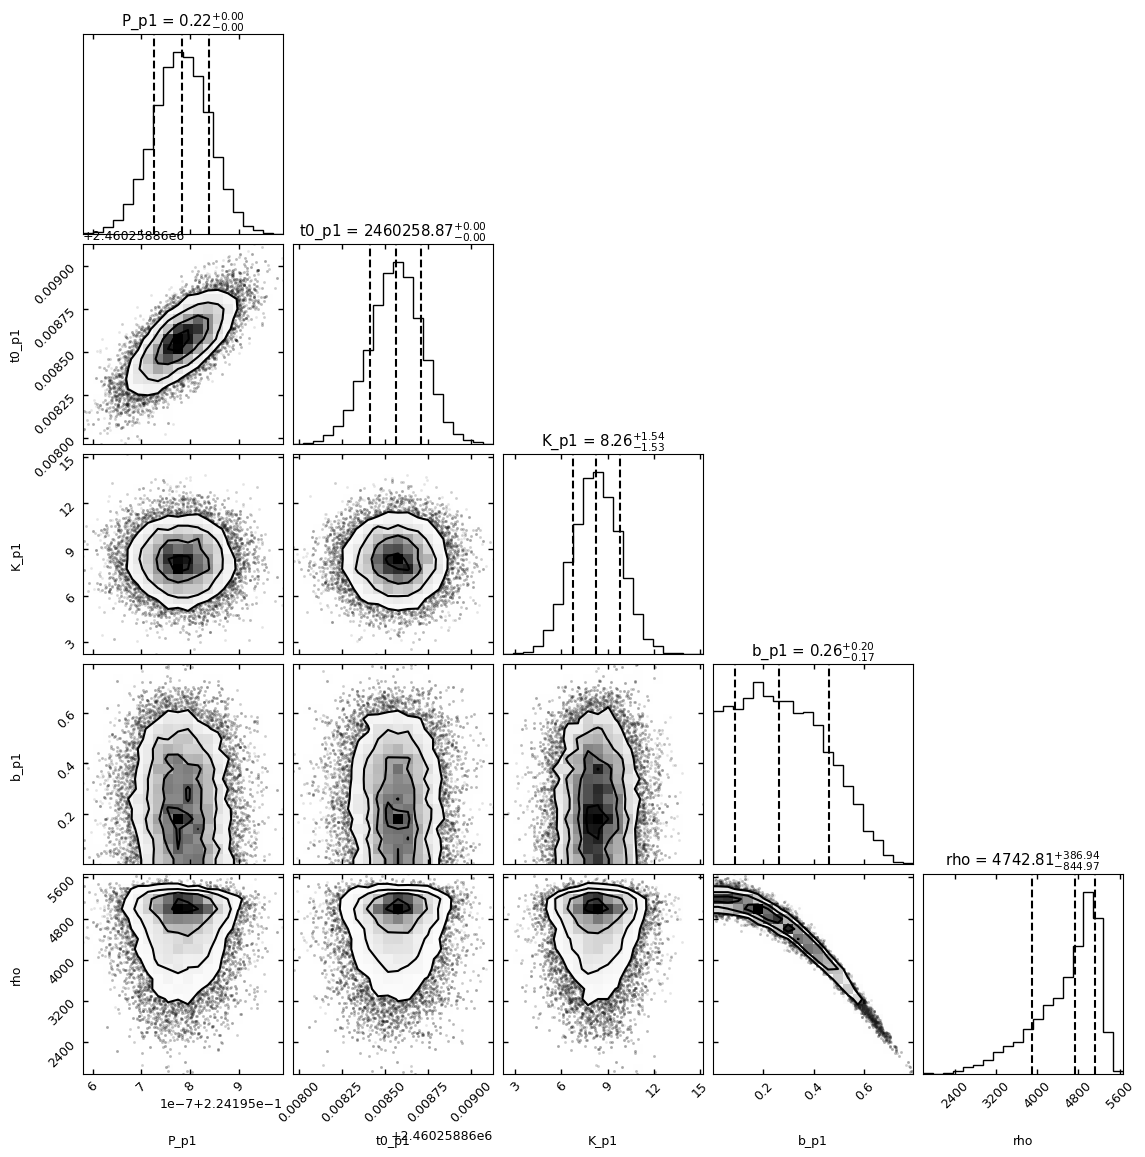

In [93]:
#We call in the samples from the posterior.
samples = results3.posteriors["posterior_samples"]

#We define an array to store the parameters we want to plot on the Corner plot.
corner_plot_params = np.vstack([samples["P_p1"],
                                samples["t0_p1"],
                                samples["K_p1"],
                                samples["b_p1"],
                                samples["rho"]]).T

#We then define the labels of the parameters.
labels = ["P_p1", "t0_p1", "K_p1", "b_p1", "rho"]

#We plot the corner plot.
corner_plot = corner.corner(corner_plot_params, labels = labels, quantiles = [0.16, 0.5, 0.84], show_titles = True)

#plt.savefig("cornerplot_fco.png", dpi = 500)
plt.show()

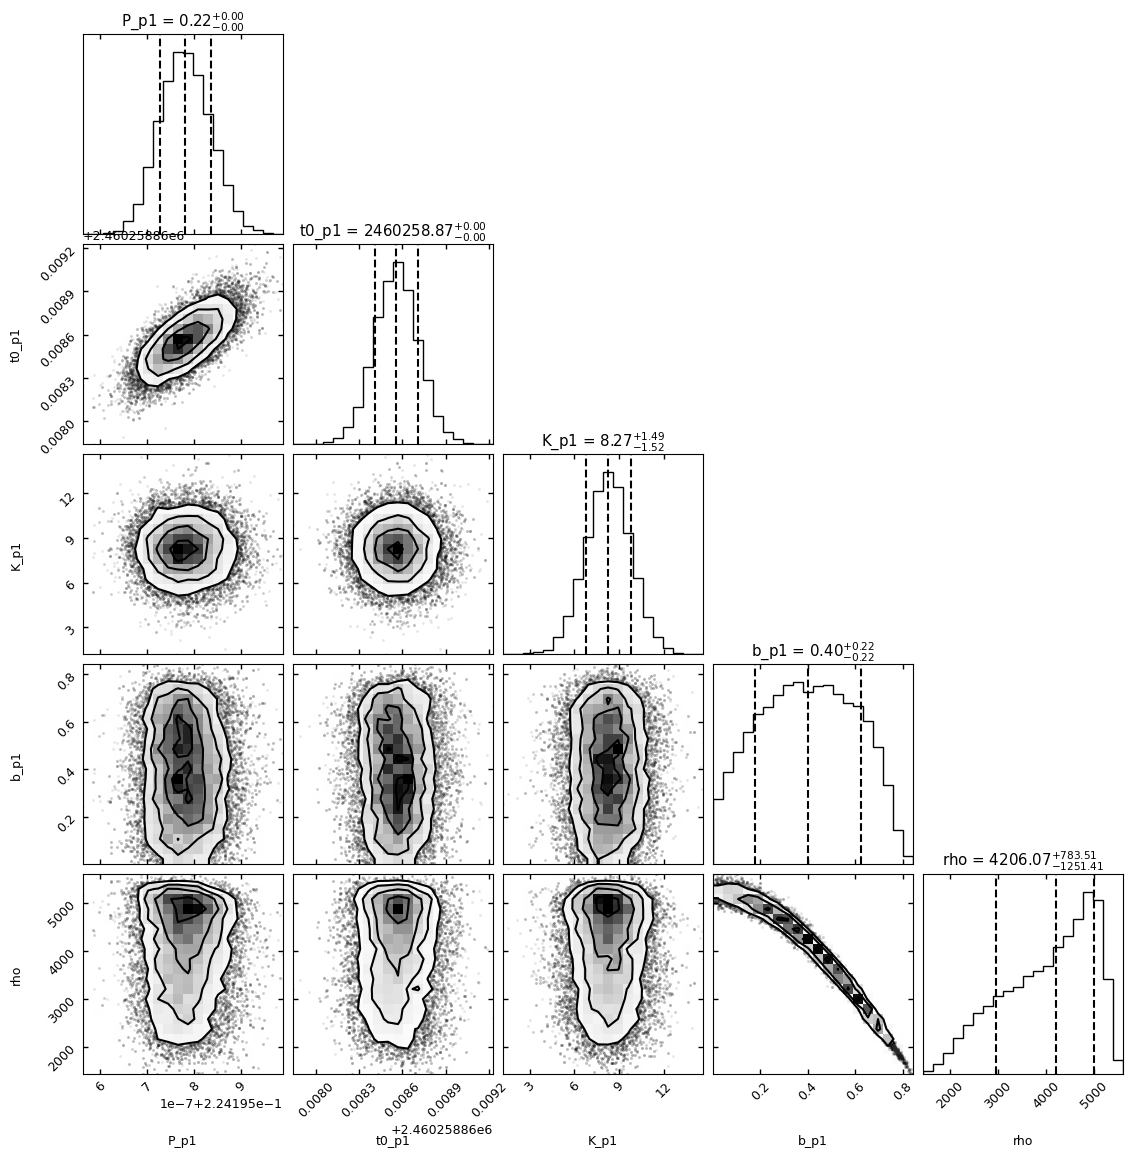

In [94]:
#We call in the samples from the posterior.
samples = results4.posteriors["posterior_samples"]

#We define an array to store the parameters we want to plot on the Corner plot.
corner_plot_params = np.vstack([samples["P_p1"],
                                samples["t0_p1"],
                                samples["K_p1"],
                                samples["b_p1"],
                                samples["rho"]]).T

#We then define the labels of the parameters.
labels = ["P_p1", "t0_p1", "K_p1", "b_p1", "rho"]

#We plot the corner plot.
corner_plot = corner.corner(corner_plot_params, labels = labels, quantiles = [0.16, 0.5, 0.84], show_titles = True)

#plt.savefig("cornerplot_fco.png", dpi = 500)
plt.show()

# GP Corner Plots: P_p1, t0_p1, K_p1, mu_NEID, b_p1, rho

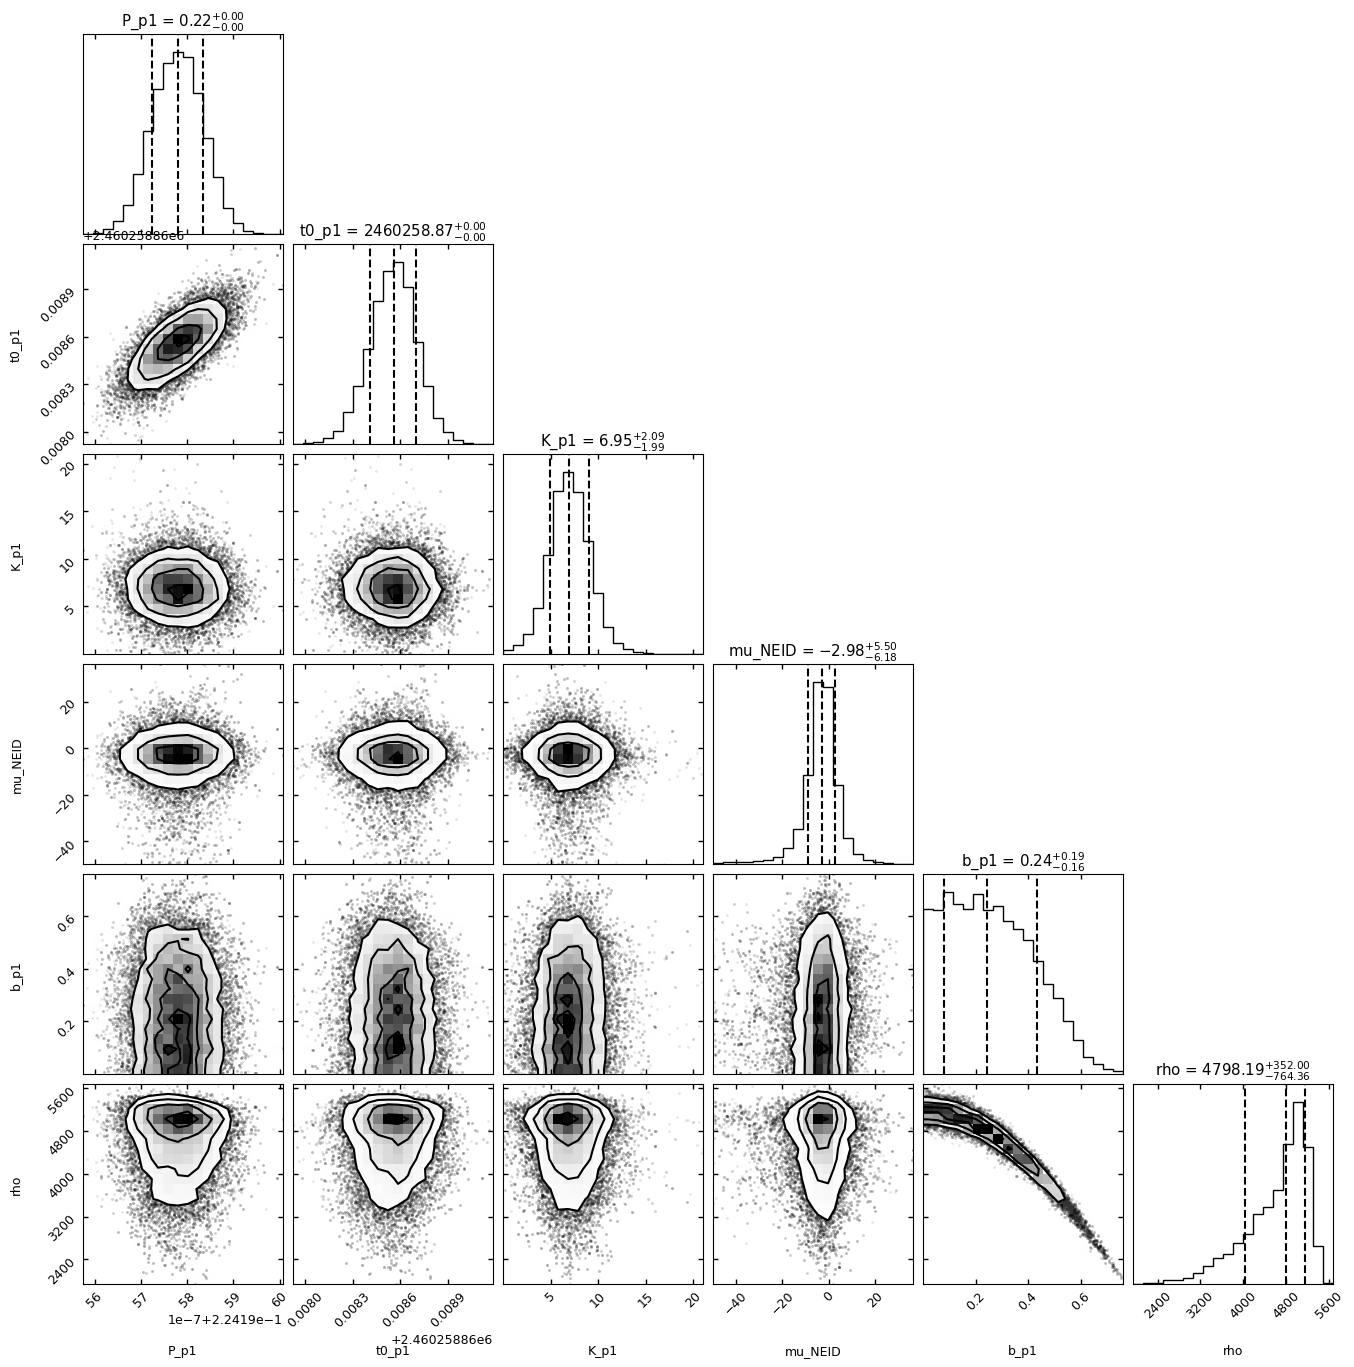

In [96]:
#We call in the samples from the posterior.
samples = results5.posteriors["posterior_samples"]

#We define an array to store the parameters we want to plot on the Corner plot.
corner_plot_params = np.vstack([samples["P_p1"],
                                samples["t0_p1"],
                                samples["K_p1"],
                                samples["mu_NEID"],
                                samples["b_p1"],
                                samples["rho"]]).T

#We then define the labels of the parameters.
labels = ["P_p1", "t0_p1", "K_p1", "mu_NEID", "b_p1", "rho"]

#We plot the corner plot.
corner_plot = corner.corner(corner_plot_params, labels = labels, quantiles = [0.16, 0.5, 0.84], show_titles = True)

#plt.savefig("cornerplot_fco.png", dpi = 500)
plt.show()

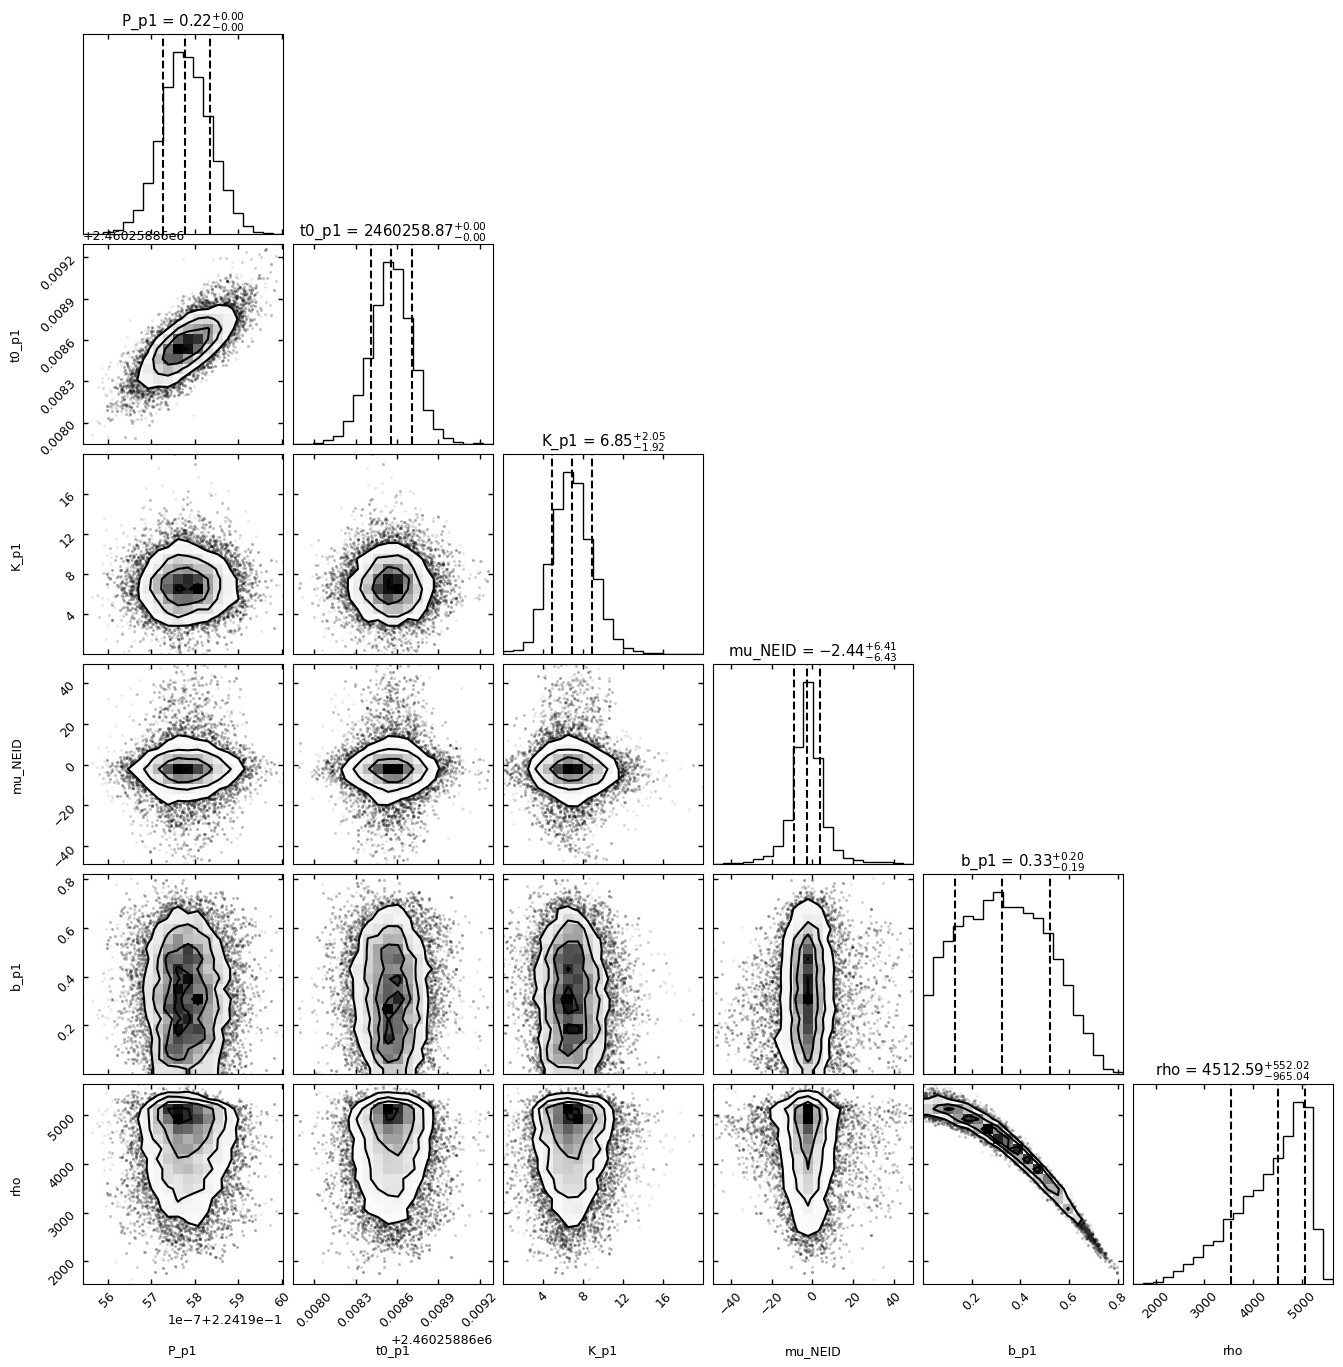

In [97]:
#We call in the samples from the posterior.
samples = results6.posteriors["posterior_samples"]

#We define an array to store the parameters we want to plot on the Corner plot.
corner_plot_params = np.vstack([samples["P_p1"],
                                samples["t0_p1"],
                                samples["K_p1"],
                                samples["mu_NEID"],
                                samples["b_p1"],
                                samples["rho"]]).T

#We then define the labels of the parameters.
labels = ["P_p1", "t0_p1", "K_p1", "mu_NEID", "b_p1", "rho"]

#We plot the corner plot.
corner_plot = corner.corner(corner_plot_params, labels = labels, quantiles = [0.16, 0.5, 0.84], show_titles = True)

#plt.savefig("cornerplot_fco.png", dpi = 500)
plt.show()

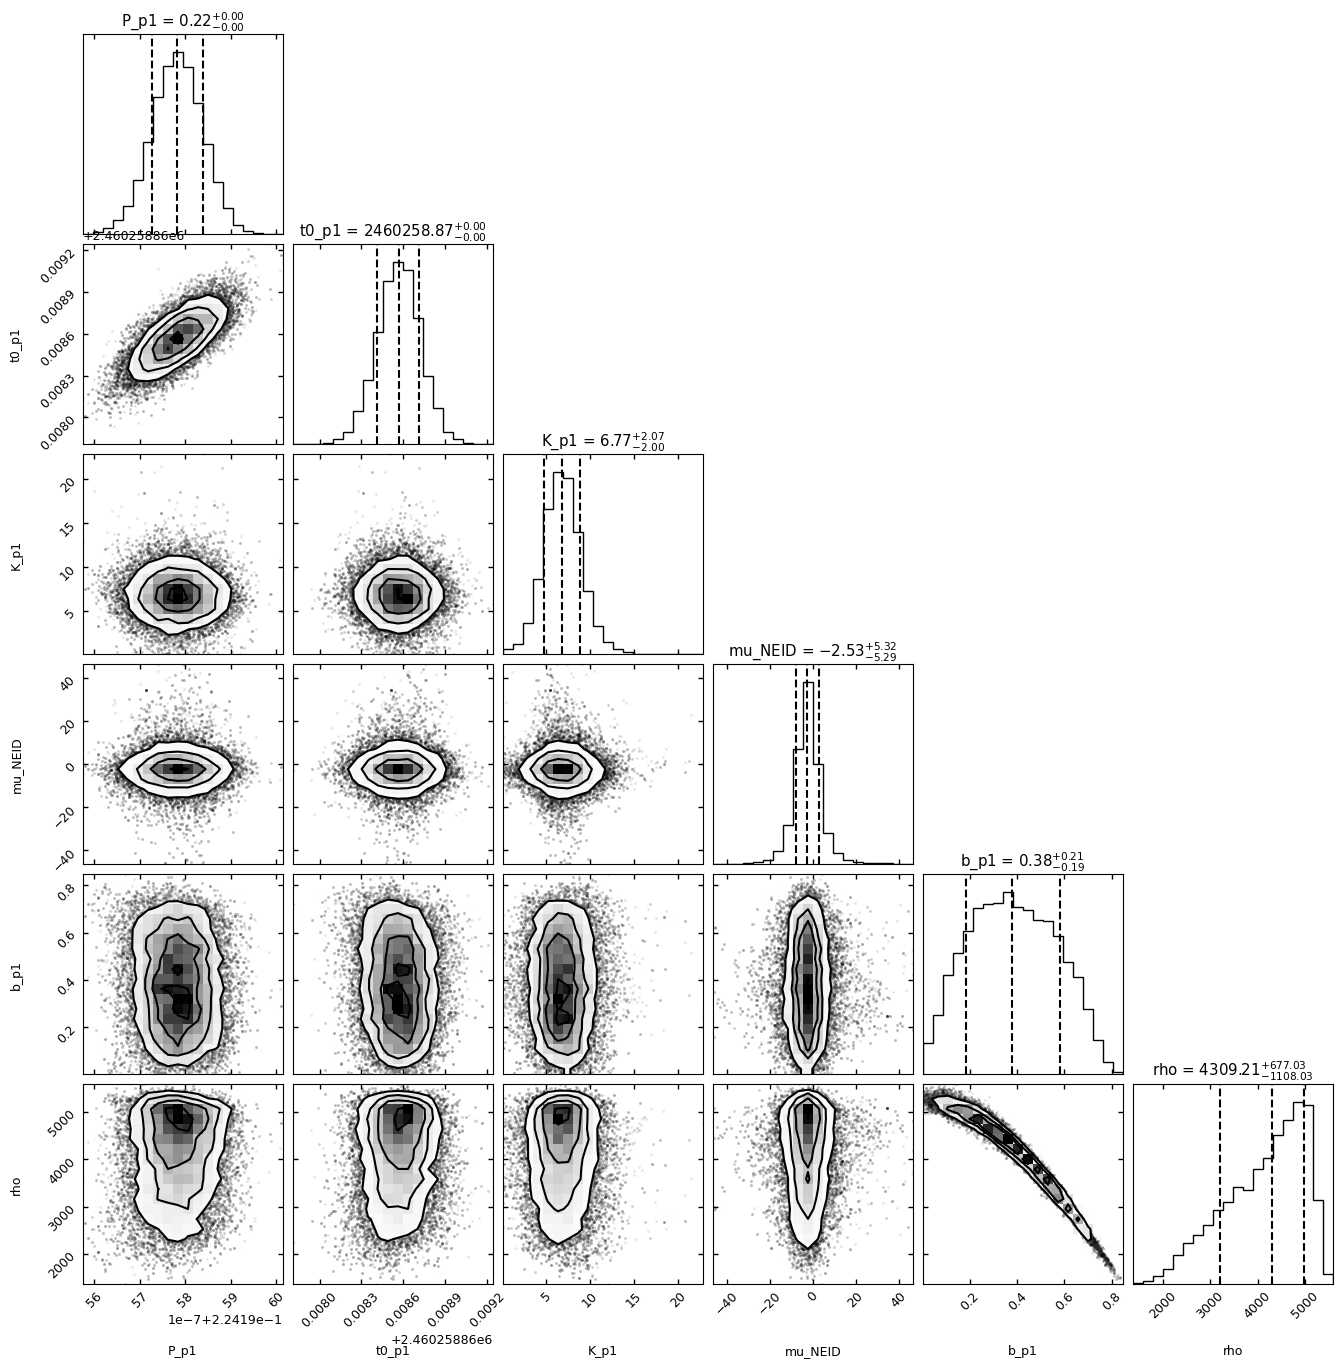

In [98]:
#We call in the samples from the posterior.
samples = results7.posteriors["posterior_samples"]

#We define an array to store the parameters we want to plot on the Corner plot.
corner_plot_params = np.vstack([samples["P_p1"],
                                samples["t0_p1"],
                                samples["K_p1"],
                                samples["mu_NEID"],
                                samples["b_p1"],
                                samples["rho"]]).T

#We then define the labels of the parameters.
labels = ["P_p1", "t0_p1", "K_p1", "mu_NEID", "b_p1", "rho"]

#We plot the corner plot.
corner_plot = corner.corner(corner_plot_params, labels = labels, quantiles = [0.16, 0.5, 0.84], show_titles = True)

#plt.savefig("cornerplot_fco.png", dpi = 500)
plt.show()

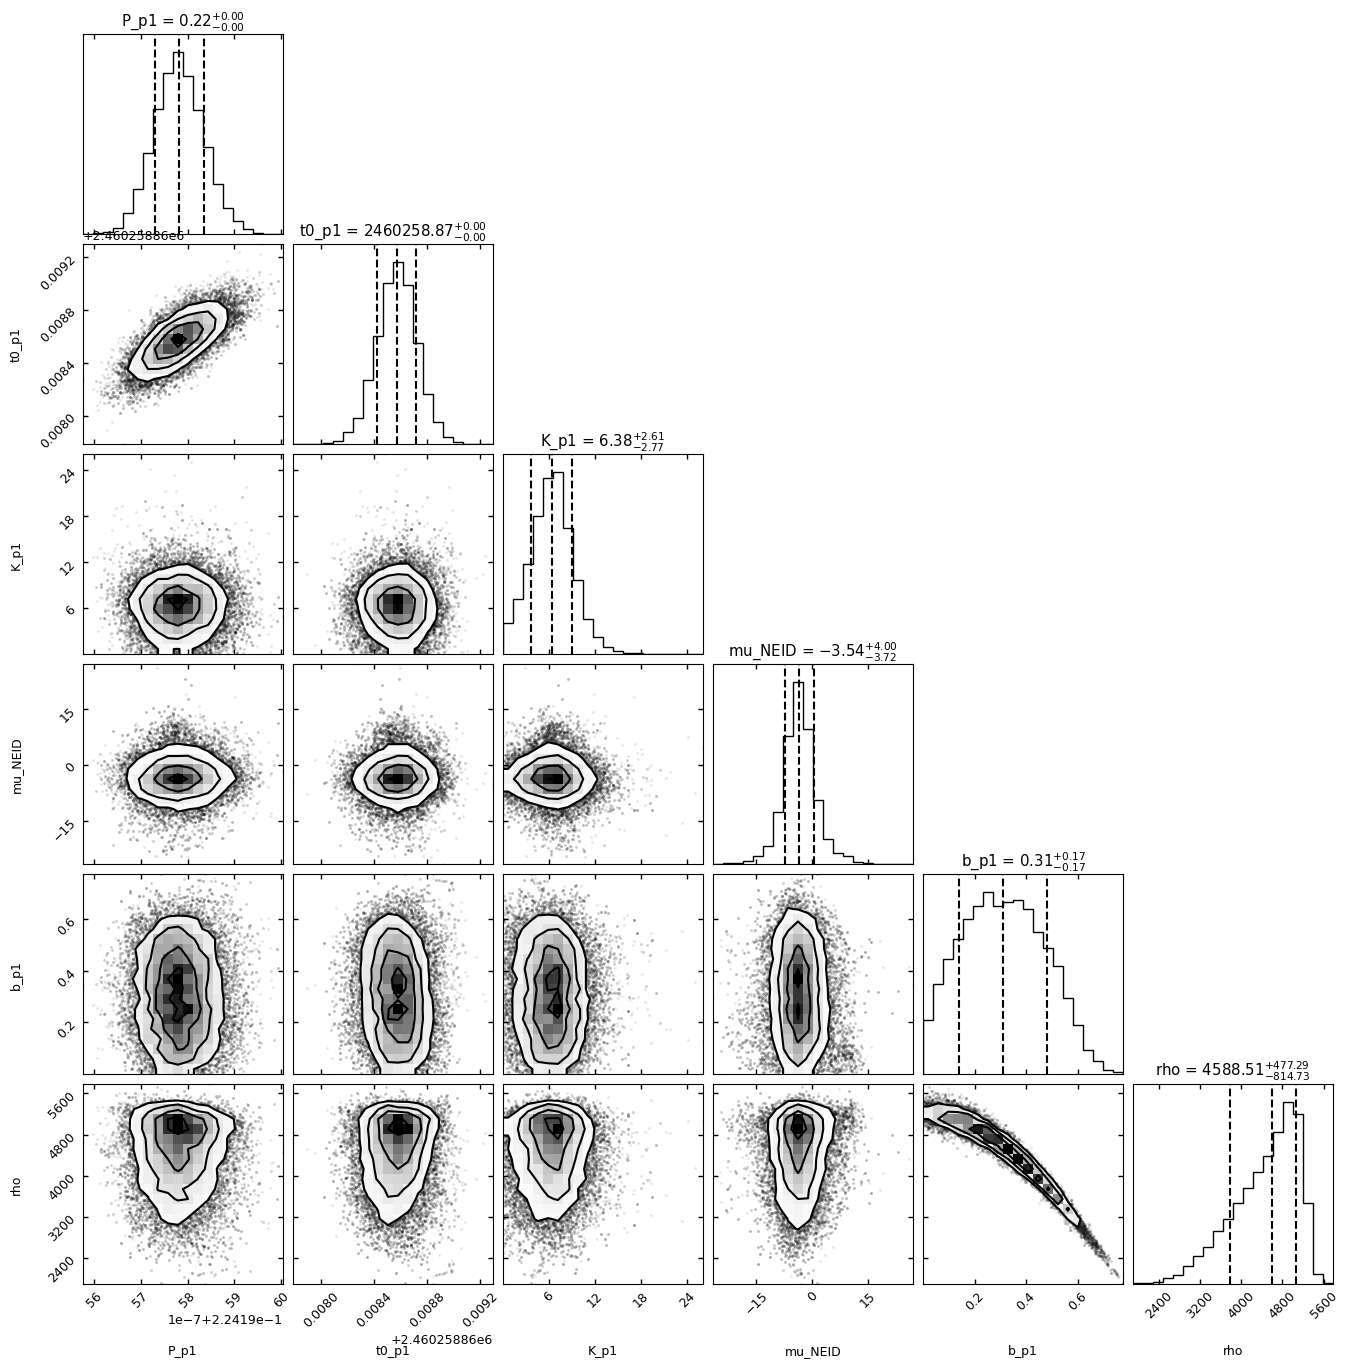

In [99]:
#We call in the samples from the posterior.
samples = results8.posteriors["posterior_samples"]

#We define an array to store the parameters we want to plot on the Corner plot.
corner_plot_params = np.vstack([samples["P_p1"],
                                samples["t0_p1"],
                                samples["K_p1"],
                                samples["mu_NEID"],
                                samples["b_p1"],
                                samples["rho"]]).T

#We then define the labels of the parameters.
labels = ["P_p1", "t0_p1", "K_p1", "mu_NEID", "b_p1", "rho"]

#We plot the corner plot.
corner_plot = corner.corner(corner_plot_params, labels = labels, quantiles = [0.16, 0.5, 0.84], show_titles = True)

#plt.savefig("cornerplot_fco.png", dpi = 500)
plt.show()

# For the Comparison of the Rho Wide Prior vs Rho Strict Prior

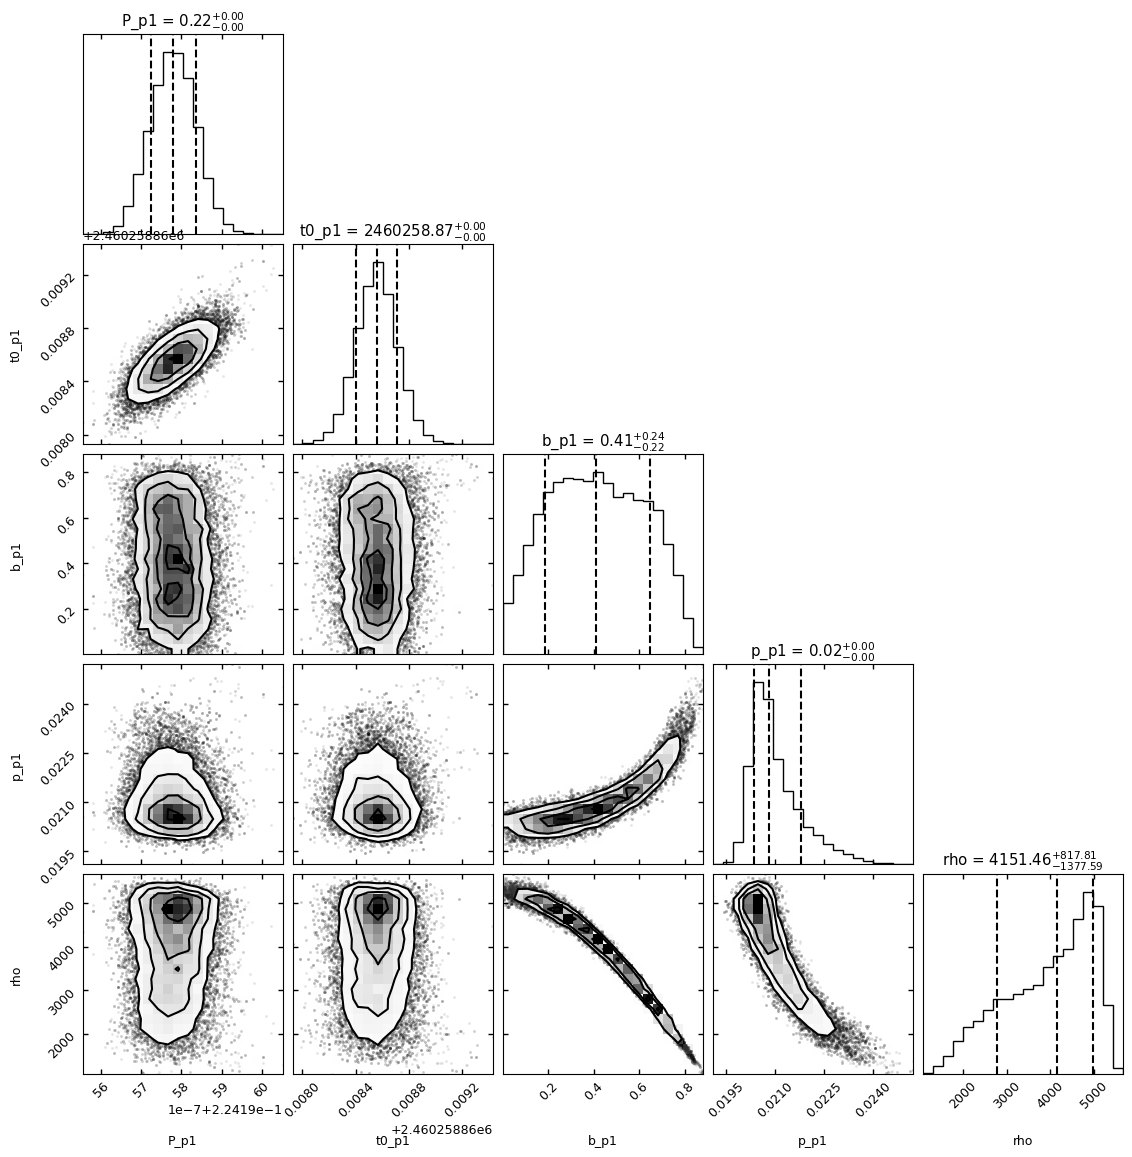

In [104]:
#We call in the samples from the posterior.
samples = results1.posteriors["posterior_samples"]

#We define an array to store the parameters we want to plot on the Corner plot.
corner_plot_params = np.vstack([samples["P_p1"],
                                samples["t0_p1"],
                                samples["b_p1"],
                                samples["p_p1"],
                                samples["rho"]]).T

#We then define the labels of the parameters.
labels = ["P_p1", "t0_p1", "b_p1", "p_p1", "rho"]

#We plot the corner plot.
corner_plot = corner.corner(corner_plot_params, labels = labels, quantiles = [0.16, 0.5, 0.84], show_titles = True)

plt.savefig("cornerplot_fco_wide_prior.png", dpi = 500)
plt.show()